In [1]:
import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/")))
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "../../codes/scpy2/")))

from scpy2.utils.nbmagics import install_magics
install_magics()
del install_magics

e:\05_Cloud_Disk\Google_Drive\Work\GitHub\Python_Scientific_Computing_Best_Practices\繁中程式碼\codes\scpy2\utils\program_finder.py:21: UserWarning: Graphviz not found
  warnings.warn("Graphviz not found")
e:\05_Cloud_Disk\Google_Drive\Work\GitHub\Python_Scientific_Computing_Best_Practices\繁中程式碼\codes\scpy2\utils\program_finder.py:25: UserWarning: Inkscape not found
  warnings.warn("Inkscape not found")


In [2]:
%matplotlib_svg
import numpy as np

# NumPy-快速處理資料

In [3]:
import numpy
numpy.__version__

'1.21.2'

## `ndarray`物件

In [4]:
import numpy as np

### 建立

需要建立陣列才能運算和操作。  
可以透過 `array()` 函數傳遞 python 的序移物件來建立陣列，如果傳遞的是多層巢狀結構的序列，將建立多維陣列。

In [5]:
a = np.array([1, 2, 3, 4])
b = np.array((5, 6, 7, 8))
c = np.array([[1, 2, 3, 4], [4, 5, 6, 7], [7, 8, 9, 10]])
%C b; c

     b                c         
------------  ------------------
[5, 6, 7, 8]  [[ 1,  2,  3,  4],
               [ 4,  5,  6,  7],
               [ 7,  8,  9, 10]]


陣列的形狀可以透過 `shape屬性` 獲得，它是一個描述陣列各個軸的長度的元組(tuple):

In [6]:
%C a.shape; b.shape; c.shape

a.shape  b.shape  c.shape
-------  -------  -------
(4,)     (4,)     (3, 4) 


還可以透過修改陣列的 `shape屬性`，在保持陣列元素個數不變的情況下，改變陣列每個軸的長度。
> 注意：只是改變每個軸的大小，陣列元素在記憶體中的位置並沒有改變。

In [7]:
c.shape = 4, 3
c

array([[ 1,  2,  3],
       [ 4,  4,  5],
       [ 6,  7,  7],
       [ 8,  9, 10]])

當設定某個軸的元素個數為 `-1` 時，將自動計算此軸的長度。

In [8]:
c.shape = 2, -1
c

array([[ 1,  2,  3,  4,  4,  5],
       [ 6,  7,  7,  8,  9, 10]])

使用陣列的 `reshape()` 方法，可以建立指定形狀的新陣列，而原陣列的形狀保持不變。

In [9]:
d = a.reshape((2,2)) # 也可以用a.reshape(2,2)
%C d; a

   d           a      
--------  ------------
[[1, 2],  [1, 2, 3, 4]
 [3, 4]]              


陣列 a 和 b 其實共用資料儲存空間，因此俢改其中一任意一個陣列的元素都會同時修改另一個陣列的內容。  

In [10]:
%C a; d
a[1] = 100 # 將陣列a的第1個元素改為100
%C a; d

     a           d    
------------  --------
[1, 2, 3, 4]  [[1, 2],
               [3, 4]]
         a                 d      
--------------------  ------------
[  1, 100,   3,   4]  [[  1, 100],
                       [  3,   4]]


### 元素型態

陣列的元素類型可以透過 `dtype屬性` 獲得。

如果使用 64位元的作業系統 和 python，那麼預設整數類型的長度為 64 位元。

In [11]:
c.dtype

dtype('int32')

可以透過 `dtype` 參數在建立陣列時指定元素類型，注意 `float` 類型是 64位元的雙精度浮點數類型，而 `complex` 是 128位的雙精度複數類型。

In [12]:
ai32 = np.array([1, 2, 3, 4], dtype=np.int32)
af = np.array([1, 2, 3, 4], dtype=float)
ac = np.array([1, 2, 3, 4], dtype=complex)
%C ai32.dtype; af.dtype; ac.dtype

  ai32.dtype        af.dtype            ac.dtype     
--------------  ----------------  -------------------
dtype('int32')  dtype('float64')  dtype('complex128')


上例中，`float` 和 `complex` 為 python 內建的浮點數類型和複數類型，而 `np.int32` 是 numpy 定義的新的資料類型。 

Numpy 自己的浮點數類型有：`float16`, `float32`, `float64`, `float128`。

在需要指定 `dtype` 參數時，也可以傳遞一個字串來表示元素的數值型態。 numpy 中的每個數值型態都有幾種字串表示法，字串和類型之間的對應關係都儲存在 `typeDict` 字典中。

下面的程式獲得與 `float64` 類型對應的所有鍵值：

In [13]:
[key for key, value in np.typeDict.items() if value is np.float64]

<ipython-input-13-b3ac95bf03fb>:1: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.
  [key for key, value in np.typeDict.items() if value is np.float64]


['double', 'd', 12, 'float64', 'f8', 'float_', 'float']

完整的類型列表可以透過下面的斜述獲得，它將 `typeDict` 字典中所有的值轉為一個集合，進一步去除其中的重複項：

In [14]:
%col 4 set(np.typeDict.values())

{numpy.bool_,          numpy.bytes_,         numpy.clongdouble,    numpy.complex128,    
 numpy.complex64,      numpy.datetime64,     numpy.float16,        numpy.float32,       
 numpy.float64,        numpy.int16,          numpy.int32,          numpy.int64,         
 numpy.int8,           numpy.intc,           numpy.longdouble,     numpy.object_,       
 numpy.str_,           numpy.timedelta64,    numpy.uint16,         numpy.uint32,        
 numpy.uint64,         numpy.uint8,          numpy.uintc,          numpy.void}          


<string>:1: DeprecationWarning: `np.typeDict` is a deprecated alias for `np.sctypeDict`.


上面顯示的數值型態與陣列的 `dtype屬性` 是不同的物件。透過 `dtype物件` 的 `type屬性` 可以獲得與其對應的數值型態：

In [15]:
c.dtype.type

numpy.int32

透過 numpy 的數值型態也可以建立數值物件，它與 python 的整數物件不同的是，它的設定範圍有限，因此計算 `200*200` 會溢位，獲得一個負數，這一點與 C 語言的結果相同：

In [16]:
a = np.int16(200)
a*a

<ipython-input-16-4c2c60806930>:2: RuntimeWarning: overflow encountered in short_scalars
  a*a


-25536

> 注意： numpy 的數值物件的運算速度比 python 的內建類型的運算速度慢很多，如果程式中需要大量地對單一數值運算，應當儘量避免使用 numpy 的數值物件。

下面比較 python 內建的與 numpy 的雙精度浮點數值 `float64` 的乘法運算的速度：

In [17]:
v1 = 3.14
v2 = np.float64(v1)
%timeit v1*v1
%timeit v2*v2

35.7 ns ± 1.48 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)
65.3 ns ± 2.25 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


使用 `astype()` 方法可以對陣列的元素類型進行轉換，  
下面將浮點數陣列 t1 轉為 32位元整數陣列，將雙精度的複數陣列 t2 轉換成單精度的複數陣列：

In [18]:
t1 = np.array([1, 2, 3, 4], dtype=float)
t2 = np.array([1, 2, 3, 4], dtype=complex)
t3 = t1.astype(np.int32)
t4 = t2.astype(np.complex64)

### 自動產生陣列

前面的實例都是先建立一個 python 的序列物件，然後透過 `np.array()` 將其轉為陣列，這樣做顯然效率不高。因此 numpy 提供了很多專門用於建立陣列的函數。下面的每個函數都有一些關鍵字參數，實際用法請檢視函數說明。

`np.arange()` 類似內建函數 `range()` ，透過指定 `開始值`、`終值` 和 `步進值` 來建立表示等差數列的一維陣列，注意所得到的結果中不包含 `終值`。

In [19]:
np.arange(0, 1, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

`np.linspane()` 透過指定 `開始值`、`終值`和`元素個數`來建立表示等差數列的一維陣列，可以透過 `endpoint` 參數指定是否包含 `終值`，預設值為 `True`，即包含 `終值`。

In [20]:
np.linspace(0, 1, 10) # 步長為1/9      # endpoint=True 表示包含 終值

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [21]:
np.linspace(0, 1, 10, endpoint=False) # 步長為1/10      # endpoint=False 表示不包含 終值

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

`np.logspace()` 和 `np.linspace()` 類似，不過它所建立的陣列是等比數列。

下面的實例產生從 $10^0$ ~ $10^2$ ，有 5 個元素的等比數列，注意起始值 0 表示 $10^0$，而終值 2 表示 $10^2$：

In [22]:
np.logspace(0, 2, 5)

array([  1.        ,   3.16227766,  10.        ,  31.6227766 ,
       100.        ])

基數可以透過 `base` 參數的指定，其預設值為 10。

下面透過將 `base` 參數設定為 2，並設定 `endpoint` 參數為 False，建之一個比例為 $2^{1/12}$ 的等比陣列。

In [23]:
np.logspace(0, 1, 12, base=2, endpoint=False)

array([1.        , 1.05946309, 1.12246205, 1.18920712, 1.25992105,
       1.33483985, 1.41421356, 1.49830708, 1.58740105, 1.68179283,
       1.78179744, 1.88774863])

`np.zeros()`, `np.ones()`, `np.empty()` 可以建立指定形狀和類型的陣列。其中 `np.empty()` 只分配陣列所使用的記憶體，不對陣列元素進行初始化操作，因此它的執行速度是最快的。


In [24]:
np.empty((2,3), np.int32)       # 其中的元素值沒有被初始化

array([[         0,          0,          0],
       [1071644672,          0, 1072693248]])

In [25]:
np.zeros(4, np.int32)       # 其中的元素值被初始化為 0

array([0, 0, 0, 0])

In [26]:
np.full(4, np.pi)           # 其中的元素值被初始化為 pi

array([3.14159265, 3.14159265, 3.14159265, 3.14159265])

此外，`np.zeros_like()`, `np.ones_like()`, `np.empty_like()`, `np.full_like()` 等函數建立與參數陣列的形狀和類型相同的陣列，因此 `np.zeros_like(a)` 和 `np.zeros(a.shape, a.dtype)` 的效果相同。

`np.frombuffer()`, `np.fromstring()`, `np.fromfile()` 等函數可以從位元組序列或檔案建立陣列。

下面以 `np.fromstring()` 為例介紹它們的用法

In [27]:
s = "abcdefgh"

python 的字串實際上是一個位元組序列，每個字元佔一個位元組。因此如果從字串 s 建立一個 8 位元的整數陣列，所得到的陣列正好就是字串中每個字元的 ASCII 編碼：

In [28]:
np.fromstring(s, dtype=np.int8)

<ipython-input-28-f9e7abe56b2b>:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(s, dtype=np.int8)


array([ 97,  98,  99, 100, 101, 102, 103, 104], dtype=int8)

如果從字串 s 建立 16 位元的整數陣列，那麼兩個相鄰的位元就表示一個整數，把位元組 98 和位元組 97 當作一個 16 位元的整數，它的值就是 $98*256+97=25185$。

可以看出，16位元的整數是以低位元組在前(little-endian)的方式儲存在記憶體中的。

In [29]:
print( 98*256+97 )
np.fromstring(s, dtype=np.int16)

25185


<ipython-input-29-8e33713fb92e>:2: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(s, dtype=np.int16)


array([25185, 25699, 26213, 26727], dtype=int16)

如果把整個字串轉為一個 64 位元的雙精度浮點數陣列，那麼它的值是：

In [30]:
np.fromstring(s, dtype=np.float64)

<ipython-input-30-04bfbf3987ca>:1: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  np.fromstring(s, dtype=np.float64)


array([8.54088322e+194])

如果我們用 C 語言的二進位方式寫了一組 double 類型的數值到某個檔案中，那就可以從此檔案讀取對應的資料，並透過 `np.fromstring()` 將其轉為 float64 類型的陣列，或直接使用 `fromfile()` 從二進位檔案讀取資料。

`np.fromstring()` 會對字串的位元組序列進行複製，而使用 `np.frombuffer()` 建立的陣列 **與原始字串共用記憶體**。由於字串是唯讀的，因此無法修改所建立的陣列的內容：

In [31]:
buf = np.frombuffer(s.encode(), dtype=np.int16)
buf[1] = 10

ValueError: assignment destination is read-only

python 中還有一些類型也支援 buffer 介面，例如 `bytearray()`, `array.array()` 等。

還可以先定義一個從索引計算數值的函數，然後用 `np.fromfunction()` 透過此函數建立陣列：

In [32]:
def func(i):
    return i % 4 + 1

np.fromfunction(func, (10,))

array([1., 2., 3., 4., 1., 2., 3., 4., 1., 2.])

`np.fromfunction()` 的第一個參數是計算每個陣列元素的函數，第二個參數指定陣列的形狀。因為它支援多維陣列，所以第二個參數必須是一個序列。

上例中第二個參數是長度為 1 的元組`(10,)`，因此建立了一個有 10 個元素的一維陣列。

下面的實例建立一個表示 九九乘法表 的二維陣列，輸出陣列 a 中的每個元素 `a[i,j]` 都等於 `func2(i,j)`：

In [33]:
def func2(i, j):
    return (i + 1) * (j + 1)
np.fromfunction(func2, (9,9))

array([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.],
       [ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18.],
       [ 3.,  6.,  9., 12., 15., 18., 21., 24., 27.],
       [ 4.,  8., 12., 16., 20., 24., 28., 32., 36.],
       [ 5., 10., 15., 20., 25., 30., 35., 40., 45.],
       [ 6., 12., 18., 24., 30., 36., 42., 48., 54.],
       [ 7., 14., 21., 28., 35., 42., 49., 56., 63.],
       [ 8., 16., 24., 32., 40., 48., 56., 64., 72.],
       [ 9., 18., 27., 36., 45., 54., 63., 72., 81.]])

### 存取元素

可以使用和清單相同的方式對陣列的元素進行存取：

In [34]:
a = np.arange(10)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

- `a[5]`: 用整數作為索引可以取得陣列中的某個元素。
- `a[3:5]`: 用切片作為索引取得陣列的一部分，包含 `a[3]` 但不包含 `a[5]`。
- `a[:5]`: 切片中省略開始索引，表示從 `a[0]` 開始。
- `a[:-1]`: 索引可以使用負數，表示從陣列最後往前數。

In [35]:
%C 4 a[5]; a[3:5]; a[:5]; a[:-1]

a[5]    a[3:5]         a[:5]                    a[:-1]          
----    ------    ---------------    ---------------------------
5       [3, 4]    [0, 1, 2, 3, 4]    [0, 1, 2, 3, 4, 5, 6, 7, 8]


- `a[1:-1:2]`: 切片中的第三個參數表示步進值，2表示隔一個元素取一個元素。
- `a[::-1]`： 省略切片的開始索引和結束索引，步進值為 -1，整個陣列頭尾顛倒。
- `a[5:1:-2]`: 步進值為負數時，開始索引必須大於結束索引。

In [36]:
%C 4 a[1:-1:2]; a[::-1]; a[5:1:-2]

 a[1:-1:2]                 a[::-1]                a[5:1:-2]
------------    ------------------------------    ---------
[1, 3, 5, 7]    [9, 8, 7, 6, 5, 4, 3, 2, 1, 0]    [5, 3]   


索引還可以用來修改元素的值：

In [37]:
a[2:4] = 100, 101
a

array([  0,   1, 100, 101,   4,   5,   6,   7,   8,   9])

和列表不同的是，透過切片取得新的陣列是原始陣列的視圖。它與原始陣列共用同一塊資料儲存空間。

 下面的程式將 b[2] 改為 -10，a[5]也同時被修改為 -10，因為它們在記憶體中的位址相同。

In [38]:
b = a[3:7] # 透過切片產生一個新的陣列b，b和a共享同一塊資料儲存空間
b[2] = -10 # 將b的第2個元素修改為-10
%C b; a

         b                                    a                         
--------------------  --------------------------------------------------
[101,   4, -10,   6]  [  0,   1, 100, 101,   4, -10,   6,   7,   8,   9]


除了使用切片索引存取元素之外， numpy 還提供了 整數清單、整數陣列、布林陣列等幾種進階索引存取方法。

當使用整數清單對陣列元素進行存取時，將使用清單中的每個元素作為索引。**使用清單作為索引獲得的陣列不和原始陣列共用資料**：

In [39]:
x = np.arange(10, 1, -1)
x

array([10,  9,  8,  7,  6,  5,  4,  3,  2])

- x[[3,3,1,8]]：取得 x 中的索引為 3, 3, 1, 8 的 4 個元素，組成一個新的陣列。
- x[[3,3,-3,8]]：索引可以是負數，-3表示取倒數第 3 個元素。(從 1 開始計數)。

In [40]:
a = x[[3, 3, 1, 8]]
b = x[[3, 3, -3, 8]]
%C a; b

     a             b      
------------  ------------
[7, 7, 9, 2]  [7, 7, 4, 2]


下面修改 b[2] 的值，但是由於它和 x 不共用記憶體，因此 x 的值不變：

In [41]:
b[2] = 100
%C b; x

         b                             x                  
--------------------  ------------------------------------
[  7,   7, 100,   2]  [10,  9,  8,  7,  6,  5,  4,  3,  2]


整數序列索引也可以用來修改元素的值：

In [42]:
x[[3,5,1]] = -1, -2, -3
x

array([10, -3,  8, -1,  6, -2,  4,  3,  2])

當使用整數陣列作為陣列索引時，將獲得一個形狀和索引陣列相同的新陣列。

In [43]:
x = np.arange(10,1,-1)
x[np.array([3,3,1,8])] 

array([7, 7, 9, 2])

當索引是多維陣列時，獲得的也是多維陣列：

In [44]:
x[np.array([[3,3,1,8],[3,3,-3,8]])] 

array([[7, 7, 9, 2],
       [7, 7, 4, 2]])

可以將上述操作了解為：  
先將索引陣列展平為一維陣列，並作為索引獲得一個新的一維陣列，然後將其形狀修改為索引陣列的形狀。

In [45]:
x[[3,3,1,8,3,3,-3,8]].reshape(2,4) # 改變陣列形狀

array([[7, 7, 9, 2],
       [7, 7, 4, 2]])

當使用 `布林陣列` b 作為索引存取陣列 x 中的元素時，將獲得陣列 x 中與陣列 b 中 True 對應的元素。

使用 `布林陣列` 作為索引獲得的陣列不和原始陣列共用資料記憶體，注意，這種方式只對應於 布林陣列，不能使用 `布林清單`。

In [46]:
x = np.arange(5,0,-1)
x

array([5, 4, 3, 2, 1])

`布林陣列` 中索引為 0,2 的元素為 True，因此取得 x 中索引為 0,2 的元素：

In [47]:
x[np.array([True, False, True, False, False])] 

array([5, 3])

如果是 `布林列表`，就把 Ture 當作 1，False當作 0，按照整數序列方式取得 x 中的元素：

In [48]:
x[[True, False, True, False, False]] 

array([5, 3])

> **WARNING**  
> 在NumPy 1.10之後的版本中布爾清單會被當作布爾陣列，因此上面的執行結果會變成`array([5, 3])`。

布林陣列 的長度不夠時，不夠的部分都當作 False：

> numpy 新版，如果布林陣列跟陣列的長度不同時，會顯示 `IndexError`

In [49]:
x[np.array([True, False, True, True])] 

IndexError: boolean index did not match indexed array along dimension 0; dimension is 5 but corresponding boolean dimension is 4

布林陣列 的索引也可以用來修改元素：

In [50]:
x[np.array([True, False, True, True, False])] = -1, -2, -3 
x

array([-1,  4, -2, -3,  1])

布林陣列 一般不是手動產生，而是使用布林運算的 `ufunc` 函數產生（下一節介紹）。

簡單的實例說明布林陣列索引的用法：

In [51]:
x = np.random.randint(0, 10, 6) # 產生一個長度為 6，元素值為 0 到 9 的隨機整數群組
%C x; x > 5

        x                             x > 5                   
------------------  ------------------------------------------
[6, 1, 6, 4, 4, 5]  [ True, False,  True, False, False, False]


運算式 `x > 5` 將陣列 x 中的每個元素和 5 進行大小比較，獲得一個布林陣列，True 表示 x 中對應的值大於 5 。

我們可以使用 `x > 5` 所得到的布林陣列收集 x 中所有大於 5 的數值：

In [52]:
x[x > 5]

array([6, 6])

### 多維陣列

多維陣列的存取和一維陣列類似，因為多維陣列有多個軸，所以它的索引需要用多個值來表示。

numpy 採用元組作為陣列的索引，元組中的每個元素和陣列的每個軸對應。圖2-1 顯示了一個 `shape` 為 (6,6) 的陣列 a，圖中用不同顏色和線型標出各個索引所對應的選擇域。


![](2022-03-17-16-55-39.png)

圖2-1 使用陣列切片語法存取多維陣列中的元素

In [53]:
a = np.arange(0, 60, 10).reshape(-1, 1) + np.arange(0, 6)
a

array([[ 0,  1,  2,  3,  4,  5],
       [10, 11, 12, 13, 14, 15],
       [20, 21, 22, 23, 24, 25],
       [30, 31, 32, 33, 34, 35],
       [40, 41, 42, 43, 44, 45],
       [50, 51, 52, 53, 54, 55]])

圖2-1 中的索引都是有兩個元素的元組，其中的第 0 個元素與陣列的第 0 軸(縱軸)對應，而第 1 個元素與陣列的第 1 軸(橫軸)對應。下面是圖中各種多維陣列切片的運算結果：

In [54]:
%C a[0, 3:5]; a[4:, 4:]; a[:, 2]; a[2::2, ::2]

a[0, 3:5]  a[4:, 4:]           a[:, 2]            a[2::2, ::2] 
---------  ----------  ------------------------  --------------
[3, 4]     [[44, 45],  [ 2, 12, 22, 32, 42, 52]  [[20, 22, 24],
            [54, 55]]                             [40, 42, 44]]


如果索引元組中只包含整數和切片，那麼獲得的陣列和原始陣列共用資料。它是原陣列的視圖。

下面的實例中，陣列 b 是 a 的視圖，它們共用資料。

In [55]:
b = a[0, 3:5]
b[0] = -b[0]
a[0, 3:5]

array([-3,  4])

因為陣列的索引是一個元組，所以我們可以將 索引元組 儲存起來，用同一個元組存取多個陣列。

In [56]:
idx = slice(None, None, 2), slice(2,None)
%C a[idx]; a[idx][idx]

      a[idx]        a[idx][idx]
------------------  -----------
[[ 2, -3,  4,  5],  [[ 4,  5], 
 [22, 23, 24, 25],   [44, 45]] 
 [42, 43, 44, 45]]             


> `切片(slice)物件`  
> 根據 python 的語法，在 `[]` 中可以使用以冒號(`:`)隔開的兩個或三個整數表示切片，但是單獨產生切片物件時需要使用 `slice()` 來建立。它有三個參數，分別為 `開始值`, `結束值`, `間隔步進值`，當這些值需要省略時可以使用 `None` 。舉例來說，`a[slice(None, None, None), 2]` 和 `a[:,2]` 相同。

用 python 的內建函數 `slice()` 建立索引比較麻煩，因此 numpy 提供了一個 `s_` 物件來幫助我們建立陣列索引，請注意 `s_` 實際上是 `IndexExpression` 類別的物件。

In [57]:
np.s_[::2, 2:]

(slice(None, None, 2), slice(2, None, None))

> `s_` 為什麼不是函數  
> 根據 python 的語法，只有在中括號 `[]` 中才能使用以冒號(`:`)隔開的切片語法，如果 `s_` 是函數，那麼這些切片必須使用 `slice()` 建立。類似的物件還有 `mgrid` 和 `ogrid` 等，後面會說。
> python 的索引語法實際上會呼叫 `__getitem__()` 方法，因此我們可以很容易自己實現 `s_` 物件的功能：
> ```python
> class S(object):
>     def __getitem__(self, index):
>         return index
> ```

在多維陣列的索引元組中，也可以使用整數元組或清單、整數陣列和布林陣列，如圖2-2 所示。當索引中使用這些物件時，所獲得的資料是原始資料的備份，因此修改結果陣列不會改變原始陣列。

![](2022-03-17-17-41-05.png)

圖2-2 使用整數序列和布林陣列存取多維陣列中的元素

在 `a[(0,1,2,3),(1,2,3,4)]` 中，索引仍然是一個有兩個元素的元組，元組中的每個元素都是一個整數元組，分別對應陣列的第0軸和第1軸。從兩個序列的對應位置取出兩個整數組成索引，於是獲得的結果是：`a[0,1], a[1,2], a[2,3], a[3,4]`。

In [58]:
a[(0,1,2,3),(1,2,3,4)]

array([ 1, 12, 23, 34])

在 `a[3:, [0,2,5]]` 中，第 0 軸的索引是一個切片物件，它選取第 3 行之後的所有行；第1軸的索引是一個整數，它選取第2列。

In [59]:
a[3:, [0,2,5]]

array([[30, 32, 35],
       [40, 42, 45],
       [50, 52, 55]])

在 `a[mask,2]` 中，第0軸的索引是一個布林陣列，它選取第0、第2和第5行；第1軸的索引是一個整數，它選取第2列。

In [60]:
mask = np.array([1,0,1,0,0,1], dtype=np.bool_)
a[mask, 2]

array([ 2, 22, 52])

注意，如果 `mask` 不是布林陣列而是整數陣列、清單 或 元組，就按照以整數陣列作為索引的方式進行運算：

In [61]:
mask1 = np.array([1,0,1,0,0,1])
mask2 = [True,False,True,False,False,True]
%C a[mask1, 2]; a[mask2, 2]

      a[mask1, 2]         a[mask2, 2] 
------------------------  ------------
[12,  2, 12,  2,  2, 12]  [ 2, 22, 52]


當索引的長度小於陣列的維數時，剩餘的各軸所對應的索引是`":"` ，即選取它們的所有資料：

In [62]:
%C a[[1,2],:]; a[[1,2]]

        a[[1,2],:]                   a[[1,2]]         
--------------------------  --------------------------
[[10, 11, 12, 13, 14, 15],  [[10, 11, 12, 13, 14, 15],
 [20, 21, 22, 23, 24, 25]]   [20, 21, 22, 23, 24, 25]]


當所有軸都用形狀相同的整數陣列作為索引時，獲得的陣列和索引陣列的形狀相同：

In [63]:
x = np.array([[0,1],[2,3]])
y = np.array([[-1,-2],[-3,-4]])
a[x,y]

array([[ 5, 14],
       [23, 32]])

效果和下面的程式相同：

In [64]:
a[(0,1,2,3),(-1,-2,-3,-4)].reshape(2,2)

array([[ 5, 14],
       [23, 32]])

當沒有指定第1軸的索引時，使用`":"` 作為索引，因此獲得了一個 3D 陣列：

In [65]:
a[x]

array([[[ 0,  1,  2, -3,  4,  5],
        [10, 11, 12, 13, 14, 15]],

       [[20, 21, 22, 23, 24, 25],
        [30, 31, 32, 33, 34, 35]]])

可以使用這種以整數陣列作為索引的方式快速取代陣列中的每個元素，例如有一個表示索引影像的陣列 image，以及一個色票面板陣列 palette，則 `palette[image]` 可以獲得透過色票面板著色之後的彩色影像：

In [66]:
palette = np.array( [ [0,0,0],                
                      [255,0,0],              
                      [0,255,0],              
                      [0,0,255],              
                      [255,255,255] ] )       
image = np.array( [ [ 0, 1, 2, 0 ],           
                    [ 0, 3, 4, 0 ]  ] )
palette[image]

array([[[  0,   0,   0],
        [255,   0,   0],
        [  0, 255,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [  0,   0, 255],
        [255, 255, 255],
        [  0,   0,   0]]])

### 結構陣列

在 C 語言口我們可以透過 `struct` 關鍵字定義結構類型，結構中的欄位佔據連續的記憶體空間。類型相同的兩個結構所佔用的記憶體大小相同，因此可以很容易定義結構陣列。和 C 語言一樣，在 numpy 中也很容易對這種結構陣列操作。只要 numpy 中的結構定義和 C 語言中的結構定義相同，就可以很方便地讀取 C 語言的結構陣列的二進位資料，將其轉為 numpy 的結構陣列。

假設我們需要定義一個結構陣列，它的每個元素都有 image, age, weight 欄位。在 numpy 中可以以下定義：

In [67]:
persontype = np.dtype({ #❶
    'names':['name', 'age', 'weight'],
    'formats':['S30','i', 'f']}, align=True)
a = np.array([("Zhang", 32, 75.5), ("Wang", 24, 65.2)], #❷
    dtype=persontype)

❶ 我們先建立一個 `dtype物件` persontype ，它的參數是一個描述結構類型的各個欄位的字典。字典有兩個：'names' 和 'formats'。每個鍵對應的值都是一個列表。'names' 定義結構中每個欄位的名稱，而 'formats'則定義每個欄位的類型。這裡我們使用類型字串定義欄位類型：

- `'S30'`：長度為30個位元組的的字串類型，由於結構中的每個元素的大小必須固定，因此需要指定字串的長度。
- `'i'`：32位元的整數類型，相當於 `np.int32`。
- `'f'`：32位元的單精度浮點數類型，相當於 `np.float32`。

❷ 然後呼叫 `np.array()` 以建立陣列，透過 `dtype` 參數指定所建立的陣列的元素類型為 persontype。下面檢視陣列 a 的元素類型：


In [68]:
a.dtype

dtype({'names': ['name', 'age', 'weight'], 'formats': ['S30', '<i4', '<f4'], 'offsets': [0, 32, 36], 'itemsize': 40}, align=True)

還可以用包含多個元組的清單來描述結構的類型：
```python
dtype([('name', '|S30'), ('age', '<i4'), ('weight', '<f4')])
```
其中形如 `(欄位名稱, 類型描述)` 的元組描述了結構中的每個欄位。類型字串前面的 `'|'`, `'<'`, `'>'`等字元表示欄位值的位元組順序：
- `|`：忽視位元組順序。
- `<`：低位 位元組在前，即小端模式(little endian)。
- `>`：高位 位元組在前，即大端模式(big endian)。

結構陣列的存取方式和一般陣列相同，透過索引能夠取得其中的元素，注意元素的值看上去像是元組，實際上是結構：

In [69]:
print( a[0] )
a[0].dtype

(b'Zhang', 32, 75.5)


dtype({'names': ['name', 'age', 'weight'], 'formats': ['S30', '<i4', '<f4'], 'offsets': [0, 32, 36], 'itemsize': 40}, align=True)

我們可以使用欄位名稱作為索引取得對應的欄位值：

In [70]:
a[0]["name"]

b'Zhang'

`a[0]` 是一個結構元素，它和陣列 a 共用記憶體資料，因此可以透過修改它的欄位來改變原始陣列中對應元素的欄位：

In [71]:
c = a[1]
c["name"] = "Li"
a[1]["name"]

b'Li'

我們不但可以獲得結構元素的某個欄位，而且可以直接獲得結構陣列的欄位，傳回的是原始陣列的視圖，因此可以透過修改 `a[0]['age']`：

In [73]:
b=a["age"]
b[0] = 40
print( a[0]["age"] )

40


透過 `a.tostring()` 或 `a.tofile()` 方法，可以將陣列 a 以二進位的方式轉換成字串或寫入檔案：

In [74]:
a.tofile("test.bin")

利用下面的 C 語言程式可以將 test.bin 檔案中的資料讀取出來。`%%file` 為 IPython 的魔法指令，它將該儲存格中的文字儲存成檑案 read_struct_array.c：

In [75]:
%%file read_struct_array.c
#include <stdio.h>

struct person 
{
    char name[30];
    int age;
    float weight;
};

struct person p[3];

void main ()
{
    FILE *fp;
    int i;
    fp=fopen("test.bin","rb");
    fread(p, sizeof(struct person), 2, fp);
    fclose(fp);
    for(i=0;i<2;i++)
    {
        printf("%s %d %f\n", p[i].name, p[i].age, p[i].weight);
    }
}

Overwriting read_struct_array.c


在 IPython 中可以透過 `!` 執行系統指令，下面呼叫 `gcc` 編譯前面的 C 語言程式並執行：

In [76]:
!gcc read_struct_array.c -o read_struct_array.exe
!read_struct_array.exe

Zhang 40 75.500000
Li 24 65.199997


> `記憶體對齊`  
> 為了記憶體定走方便，C 語言的結構類型會自動增加一些填充用的元組，這叫做記憶體對齊。例如下面 C 語言中定義的結構的 `name` 欄位雖然是 30 個位元組長，但是由於記憶體對齊問題，在 `name` 和 `age` 中間會填補兩個位元組。因此，如果陣列中所設定的記憶體大小不符合 C 語言的對齊標準，將出現資料錯位。為了解決這個問題，在建立 dtype 物件時，可以傳遞參數 `align=True`，這樣結構陣列的記憶體對齊就和 C 語言的結構類型一致了。在前面的實例中，由於建立 persontype 時指定 `align` 參數為 True，因此它佔用 40 個位元組。

結構類型中可以包含其他的結構類型，下面的敘述建立一個有一個欄位 f1 的結構，f1 的值是另一個結構，它有欄位 f2，類型為 16 位元整數：

In [77]:
np.dtype([('f1', [('f2', np.int16)])])

dtype([('f1', [('f2', '<i2')])])

當某個欄位類型為陣列時，用元組的第三個元素表示其形狀。在下面的結構中，f1 欄位是一個形狀為 (2,3) 的雙精度浮點陣列：

In [96]:
np.dtype([('f0', 'i4'), ('f1', 'f8', (2, 3))])

dtype([('f0', '<i4'), ('f1', '<f8', (2, 3))])

用下面的字典參數也可以定義結構類型，字典的鍵為結構的欄位名稱，值為欄位的類型描述。但是由於字典的鍵是沒有順序的，因此欄位的順序需要在類型描述中列出。類型描述是一個元組，它的第二個值列出欄位的以位元組為單位的偏移量，例如下例中的 age 欄位的偏移量為 25 個位元組：

In [78]:
np.dtype({'surname':('S25',0),'age':(np.uint8,25)})

dtype([('surname', 'S25'), ('age', 'u1')])

### 記憶體結構

陣列物件是如何在記憶體中儲存的？如圖2-3所示，陣列的描述資訊儲存在一個資料結構中，這個結構參考兩個物件：用於儲存資料的儲存區域和用於描述元素類型的 `dtype` 物件。

![](2022-03-18-09-18-27.png)

圖2-3 np.ndarray 陣列物件在記憶體中的儲存方式

資料儲存區域儲存著陣列中所有元素的二進位資料，`dtype物件` 則知道如何將元素的二進位資料轉為可用的值。陣列的維數和形狀等資訊都儲存在 `ndarray` 陣列物件的資料結構中。圖2-3中顯示的是下面陣列 a 的記憶體結構：

In [79]:
a = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32)

陣列物件使用 `strides` 屬性儲存每個軸上相鄰兩個元素的位址差，即當某個軸的索引增加 1 時，資料儲存區中的指標所增加的位元組數。例如圖2-3 中的 `strides` 為 (12,4)，即第 0 軸的索引增加 1 時，資料的位址增加 12 個位元組。也就是 `a[1,0]` 的地址比 `a[0,0]` 的地址大12，正好是 3 個單精度浮點數的總位元組數。第 1 軸的索引增加 1 時，資料的位址增加 4 個位元組，正好是一個單精度浮點數的位元組數。

如果 `strides` 屬性中的數值正好和對應軸所佔據的位元組數相同，那麼資料在記憶體中是連續儲存的。透過切片索引獲得的新陣列是原始陣列的視圖，即它和原始陣列共用資料儲存區域，但是新陣列的 `strides` 屬性會發生變化：

In [80]:
b = a[::2, ::2]
%C b; b.strides

    b       b.strides
----------  ---------
[[0., 2.],  (24, 8)  
 [6., 8.]]           


由於陣列 b 和陣列 a 共用資料儲存區，而陣列 b 中的第 0 軸和第 1 軸都是從 a 中隔一個元素取一個，因此陣列 b 的 `strides` 變成了 (24, 8) ，正好都是陣列 a 的兩倍。對照前面的圖2-3 很容易看出資料 0 和 2 的位址相差 8 個位元組，而資料 0 和 6 的位址相差 24 個位元組。

元素在資料儲存區中的排列格式有兩種：C 語言格式和 Fortan 語言格式。在 C 語言中，多維陣列的第 0 軸是最上位的，即第 0 軸的索引增加 1 時，元素的位址增加的位元組數最多；而 Fortan 語言中的多維陣列的第 0 軸是最下位的，即第 0 軸的索引增加 1 時，位址只增加一個元素的位元組數。在 numpy 中預設以 C 語言格式儲存資料，如果希望改為 Fortan 格式，只需要在建立陣列時，設定 `order` 參數為 `"F"`：

In [82]:
c = np.array([[0,1,2],[3,4,5],[6,7,8]], dtype=np.float32, order="F")
c.strides

(4, 12)

了解了陣列的記憶體結構，就可以解釋使用索引取得資料時的複製和參考問題：
- 當索引使用整數和切片時，所取得的資料儲存區中是等間隔分佈的。因為只需要修改圖2-3 所示的資料結構中的 dim count, dimensions, stride 等屬性以及指向資料儲存區域的指標 data，就能實現整數利切片索引，所以新陣列和原始陣列能夠共用資料儲存區域。
- 當使用整數序列、整數陣列和布林陣列時，不能保障所取得的資料在資料儲存區域中是等間隔的，因此無法和原始陣列共用資料，只能對資料進行複製。

陣列的 `flags` 屬性描述了資料儲存區域的一些屬性，直接檢視 `flags` 屬性將輸出各個標示的值，也可以單獨獲得其中的某個標示值：

In [83]:
print( a.flags )
print( "c_contiguous:", a.flags.c_contiguous )

  C_CONTIGUOUS : True
  F_CONTIGUOUS : False
  OWNDATA : True
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

c_contiguous: True


下面是幾個比較重要的標示：
- C_CONTIGUOUS: 資料儲存區域是否是 C 語言格式的連續區域。
- F_CONTIGUOUS: 資料儲存區域是否是 Fortan 語言格式的連續區域。
- OWNDATA: 陣列是否擁有此資料儲存區域，當一個陣列是其他陣列的視圖時，它不擁有資料儲存區域。

由於陣列 a 是透過 np.array() 直接建立的，因此它的資料儲存區域是 C 語言格式的連續區域，並且它擁有資料儲存區域。下面我們看看陣列 a 的轉置標示，陣列的轉置可以透過其 `T` 屬性獲得，轉置陣列將其資料儲存區域看作 Fortan 語言格式的連續區域，並且它不擁有資料儲存區域。

In [84]:
a.T.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

下面檢視陣列 b 的標示，它不擁有資料儲存區域，其資料也不是連續儲存的。透過視圖陣列的 `base` 屬性可以獲得儲存資料的原始陣列：

In [85]:
b.flags

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

In [86]:
%C id(b.base); id(a)

  id(b.base)       id(a)    
-------------  -------------
2543488362608  2543488362608


還可以透過 `view()` 方法從同一塊資料區建立不同的 `dtype` 的陣列物件，也就是使用不同的數值型態檢視同一段記憶體中的二進位資料：

In [87]:
a = np.array([[0, 1], [2, 3], [4, 5]], dtype=np.float32)
b = a.view(np.uint32)
c = a.view(np.uint8)
%C 2 b; c

            b                                   c                     
--------------------------  ------------------------------------------
[[         0, 1065353216],  [[  0,   0,   0,   0,   0,   0, 128,  63],
 [1073741824, 1077936128],   [  0,   0,   0,  64,   0,   0,  64,  64],
 [1082130432, 1084227584]]   [  0,   0, 128,  64,   0,   0, 160,  64]]


由於陣列 a 的元素類型是單精度浮點數，佔用 4 個位元組，透過 `a.view(np.uint32)` ，我們建立了一個新的陣列，它和陣列 a 使用同一段資料記憶體，但是它將每 4 個位元組的資料當作無號 32 位元整數處理。而 `a.view(np.uint8)` 將每個位元組都當作一個單字節的不帶正負號的整數，因此獲得一個形狀為 (3,8) 的陣列。

透過 `view()` 方法獲得的新陣列與原陣列共用記憶體，當 `a[0,0]` 被修改時，`b[0,0]` 和`c[0:4]` 都會改變：

In [88]:
a[0, 0] = 3.14
%C 2 b[0, 0]; c[0, :4]

 b[0, 0]          c[0, :4]      
----------  --------------------
1078523331  [195, 245,  72,  64]


下面使用 `view()` 方法的實例。在《雷神之錘III：競技場》的 C 語言原始程式碼中有這樣一個神奇的計算平方根倒數的函數 `Q_rsqrt()` 。程式中使用牛頓反覆運算法計算平方根倒數，這並沒有任何神奇之處，但是其中包含了一個神奇的數字 `0x5f3759df`，並將單精度浮點數當作 32 位元的整數進行了一次令人毫無頭緒的運算：

> **LINK**

> http://zh.wikipedia.org/wiki/平方根倒數速算法

> 維基百科關於雷神之錘中使用`0x5f3759df`計算平方根倒數算法的解釋

```c
float Q_rsqrt(float number)
{
    long i;
    float x2, y;
    const float threehalfs = 1.5F;

    x2 = number * 0.5F;
    y = number;
    i = *(long*) &y;            // 對浮點數的邪惡級 hack
    i = 0x5f3759df - (i>>1);    // 這到底是怎麼回事？
    y = *(float*) &i;
    y = y*(threehalfs - (x2*y*y));     // 第一次牛頓反覆運算
    return y;
}
```

下面用 numpy 實現同樣的計算：

In [89]:
number = np.linspace(0.1, 10, 100)
y = number.astype(np.float32)  #❶
x2 = y * 0.5
i = y.view(np.int32)  #❷
i[:] = 0x5f3759df - (i >> 1)  #❸
y = y * (1.5 - x2 * y * y)  #❹
np.max(np.abs(1 / np.sqrt(number) - y))  #❺

0.005045614041059743

- ❶ 由於 `linspace()` 建立的陣列的類型為雙精度浮點數，因此這裡首先透過 `astype()` 方法將其轉換成單精度浮點數陣列 y。
- ❷ 透過 `view()` 方法建立一個 y 共用記憶體的 32 位元整數陣列 i。
- ❸ 對整數陣列 i 進行那段完全摸不著頭腦的運算，並且將結果重新寫入陣列 i 中。由於 i 和 y 共用記憶體，此時 y 中的值也發生了變化。注意這裡的設定值不能使用 `i=0x5f3759df -(i>>1)` ，如果這樣寫，那麼陣列 i 就是一個全新的陣列了。
- ❹ 進行一次牛頓反覆運算，這裡由於使用 `y=...` 的寫法，因此 y 將變成一個全新的陣列，和原來的 i 不再共用記憶體。在這段程式中有很多陣列運算，關於這方面的內容將在下一節進行說明。
- ❺ 最後輸出真實值和近似值之間的最大誤差。下圖顯示了絕對誤差與引數的關係。當 number 很小時絕對誤差較大，但此時的函數值也較大，因此相對誤差的變化並不大。

In [93]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

plt.rcParams["font.family"] = "simsun" # 可以直接修改設定字典，設定預設字型，這樣就不需要在每次繪製文字時設定字型了
plt.rcParams['axes.unicode_minus']=False    # 當座標軸上的 負號 無法正常顯示時，需加這行 code

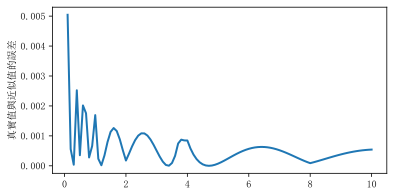

In [94]:
#%figonly=雷神之錘中計算平方根倒數算法的絕對誤差
# import pylab as pl
# pl.plot(number, 1/np.sqrt(number) - y, lw=2)
# pl.ylabel(u"真實值與近似值的誤差");
plt.plot(number, 1/np.sqrt(number) - y, lw=2)
plt.ylabel(u"真實值與近似值的誤差");

除了使用切片從同一塊資料區建立不同的 `shape` 和 `strides` 的陣列物件之外，還可以直接設定這些屬性，進一步獲得用切片實現不了的效果，例如：

In [95]:
from numpy.lib.stride_tricks import as_strided
a = np.arange(6)
b = as_strided(a, shape=(4, 3), strides=(4, 4))
%C a; b

        a                b     
------------------  -----------
[0, 1, 2, 3, 4, 5]  [[0, 1, 2],
                     [1, 2, 3],
                     [2, 3, 4],
                     [3, 4, 5]]


這實例中，從 numpy 的輔助模組中載入了 `as_strided()` 函數，並使用它從一個長度為 6 的一維陣列 a 建立了一個 `shape` 為 (4,3) 的二維陣列 b。由於透過 `strides` 參數直接指定了陣列 b 的 `strides` 屬性，因此不僅陣列 b 與 a 共用資料區，而且 b 中的前後兩行有兩個元素是重合的。例如下面修改 `a[2]` 的值，b 中的前行三行中對應的元素也發生改變：

In [96]:
a[2] = 20
b

array([[ 0,  1, 20],
       [ 1, 20,  3],
       [20,  3,  4],
       [ 3,  4,  5]])

> 需要注意：使用 `as_strided()` 時 numpy 不會進行記憶體越界檢查，因此 `shape` 和 `strides` 設定不當可能會發生意想不到的錯誤。